---
# Traverse Directory & process all datasets

---

In [2]:
import os
from pathlib import Path
from netCDF4 import Dataset
import numpy as np

#init
base_directory = ('C:/Sentinel 3 Data/')
k=0

path = Path(base_directory)

for root, dirs, files in os.walk(base_directory):
    path = root.split(os.sep)
    #print((len(path) - 1) * '---', os.path.basename(root))
    basename = os.path.basename(root)
    abspath = os.path.abspath(root)
    #print(basename)
    #print(abspath)

    #Folders ending with .SEN3 contain Sent3 Data
    if basename.endswith('.SEN3'):
        k+=1
        #print(k)

        #creating filepath names
        climate_filepath = (abspath + "/LST_in.nc")
        cart_filepath = (abspath + "/geodetic_in.nc")

        #Read Files
        nc = Dataset(climate_filepath, "r", format="NETCDF4")
        cord = Dataset(cart_filepath, "r", format="NETCDF4")

        #Extract values from files
        lat = np.array(cord.variables["latitude_in"])
        lon = np.array(cord.variables["longitude_in"])
        LST = np.array(nc.variables["LST"])

        #Create Dataframe from values
        df = pd.DataFrame({'Lat':lat[0], 'Lon':lon[0], 'LST':LST[0]})
        df.reset_index

ModuleNotFoundError: No module named 'netCDF4'

---
# Testing A single dataset
---

In [ ]:
#https://www.earthinversion.com/utilities/reading-NetCDF4-data-in-python/
from netCDF4 import Dataset
import numpy as np
import pandas as pd
import dplython

path_pc = 'H:/Thesis Sentinel Data/2018/covid/05-May/S3A_SL_2_LST____20180523T190820_20180523T204919_20180525T030656_6059_031_270______LN2_O_NT_003/'\
       'S3A_SL_2_LST____20180523T190820_20180523T204919_20180525T030656_6059_031_270______LN2_O_NT_003.SEN3'
path_laptop = 'C:/Users/Massimo/Documents/SchoolFolder/ThirdYear/Thesis/SentinelData/2021/extra/' \
       'S3B_SL_2_LST____20210616T094035_20210616T094335_20210617T190722_0179_053_307_2340_LN2_O_NT_004.SEN3'

##Set up path
path = path_laptop

#creating filepath names
climate_filepath = (path + "/LST_in.nc")
cart_filepath = (path + "/geodetic_in.nc")

#Read Files
nc = Dataset(climate_filepath, "r", format="NETCDF4") #dataset == nc_open()
cord = Dataset(cart_filepath, "r", format="NETCDF4")
#print(nc)#dataset information
print(nc.variables.keys())# get all variable names
#temp = nc.variables['LST'] # individually access each variable
#print(temp)
#print(temp.dimensions)
#print(temp.shape)

#for d in nc.dimensions.items():#dimension size
#  print(d)

#lst = nc.variables["LST"]
#print(lst)
#l = lst[:]
#print(l)

lat = np.array(cord.variables["latitude_in"])
#print(' \n LAT:\n '+ str(lat))#np.array == as.vector(), var.variables == ncvar_get()
lon = np.array(cord.variables["longitude_in"])
LST = np.array(nc.variables["LST"])

#print(lat)
#print(lon)
print(LST[:])
#########


dict_keys(['LST', 'LST_orphan', 'LST_uncertainty', 'LST_uncertainty_orphan', 'exception', 'exception_orphan'])
[[-32768. -32768. -32768. ... -32768. -32768. -32768.]
 [-32768. -32768. -32768. ... -32768. -32768. -32768.]
 [-32768. -32768. -32768. ... -32768. -32768. -32768.]
 ...
 [-32768. -32768. -32768. ... -32768. -32768. -32768.]
 [-32768. -32768. -32768. ... -32768. -32768. -32768.]
 [-32768. -32768. -32768. ... -32768. -32768. -32768.]]


In [ ]:
#for l in lat:
#    print(len(l))


1500

In [ ]:
##data.frame()
#https://www.geeksforgeeks.org/make-a-pandas-dataframe-with-two-dimensional-list-python/#
#df_list = [['lat',lat],['lon', lon],['LST', LST]]
#df_list = [lat,lon,LST]
#print(df_list)
#########

#d = {'Lat':lat, 'Lon':lon, 'LST':LST}
df = pd.DataFrame({'Lat':lat[0], 'Lon':lon[0], 'LST':LST[0]})
df.reset_index
#df = pd.DataFrame(data=d, index=['Lat'])
#https://stackoverflow.com/questions/17839973/constructing-pandas-dataframe-from-values-in-variables-gives-valueerror-if-usi
print(df)
#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html


            Lat        Lon      LST
0     41.998781   0.564993 -32768.0
1     41.997752   0.576984 -32768.0
2     41.996722   0.588974 -32768.0
3     41.995693   0.600965 -32768.0
4     41.994663   0.612956 -32768.0
...         ...        ...      ...
1495  39.121308  17.842920 -32768.0
1496  39.118537  17.853920 -32768.0
1497  39.115765  17.864920 -32768.0
1498  39.112994  17.875919 -32768.0
1499  39.110223  17.886919 -32768.0

[1500 rows x 3 columns]


In [ ]:
maltese_filter = df[(df['Lat'] >= 35.7) & (df['Lat'] <=36.1) & (df['Lon'] >= 14.1) & (df['Lon']<=14.6) ]
#lat >= 35.7 & lat <=36.1 & lon >= 14.1 & lon <=14.6
maltese_filter.reset_index
print(maltese_filter)
#https://gist.github.com/conormm/fd8b1980c28dd21cfaf6975c86c74d07#

Empty DataFrame
Columns: [Lat, Lon, LST]
Index: []


In [ ]:
df = df.dropna()
print(df)

            Lat        Lon      LST
0     41.998781   0.564993 -32768.0
1     41.997752   0.576984 -32768.0
2     41.996722   0.588974 -32768.0
3     41.995693   0.600965 -32768.0
4     41.994663   0.612956 -32768.0
...         ...        ...      ...
1495  39.121308  17.842920 -32768.0
1496  39.118537  17.853920 -32768.0
1497  39.115765  17.864920 -32768.0
1498  39.112994  17.875919 -32768.0
1499  39.110223  17.886919 -32768.0

[1500 rows x 3 columns]


In [ ]:
df = df.assign(LST = lambda dataframe: dataframe)

In [ ]:
#LST_DF = pd.DataFrame(df_list)
#LST_DF = pd.DataFrame(df_list, columns=['lat','lon','LST'])
#LST_DF = pd.DataFrame({"lat": lat, "lon": lon, "LST": LST}, index=)
#print(LST_DF)

#data = {'lat':[lat], 'lon':[lon], 'LST':[LST]}
#data = {'lat':lat, 'lon':lon, 'LST':LST}#same as above
#data = {'lat': pd.Series(lat), 'lon': pd.Series(lon), 'LST': pd.Series(LST)}
#print(data)
#LST_DF = pd.DataFrame(data, index=lon)

#print(LST_DF.loc[LST_DF[0] == "lon"])

#https://gist.github.com/conormm/fd8b1980c28dd21cfaf6975c86c74d07#
#maltese_filter = LST_DF[(LST_DF["lat"] >= 35.7) & (LST_DF["lon"] >= 14.1) & (LST_DF["lon"] <= 14.6)]
#maltese_filter = LST_DF[(LST_DF.loc[LST_DF[0] == "lat"] >= 35.7)&(LST_DF.loc[LST_DF[0] == "lon"] >= 14.1)&(LST_DF.loc[LST_DF[0] == "lon"]<=14.6)]
#print(maltese_filter)

'''
f <- rep(1/9, 9)
smth_x <- filter(x, f, sides=2)

import numpy, scipy.signal
taps = numpy.repeat(1.0/9, 9)
smoothed_x = scipy.signal.lfilter(taps, 1.0, x)'''


# Testing w/ GDAL

In [ ]:
from osgeo import gdal
#https://gis.stackexchange.com/questions/395666/georeferencing-sentinel-3-lst-product

gdal_translate -of XYZ NETCDF:"S4_radiance_an.nc":S4_radiance_an S4_radiance.csv
gdal_translate -of XYZ NETCDF:"geodetic_an.nc":latitude_an latitude.csv
gdal_translate -of XYZ NETCDF:"geodetic_an.nc":longitude_an longitude.csv

echo X,Y,Z >merged.csv
paste longitude.csv latitude.csv S4_radiance.csv|gawk 'BEGIN{OFS=","}{print($3/1000000,$6/1000000,$9)}' >>merged.csv
ogr2ogr -a_srs "EPSG:4326"  -mapFieldType All=Integer -oo X_POSSIBLE_NAMES=X* -oo Y_POSSIBLE_NAMES=Y* -oo KEEP_GEOM_COLUMNS=NO newS4_radiance.shp merged.csv

SyntaxError: invalid syntax (Temp/ipykernel_3944/3344981330.py, line 4)

---
# Testing w/ CSV

---

In [ ]:
import pandas as pd

path_pc = 'C:/Users/Massimo/Documents/SchoolFolder/MassThesis/doc'
path_laptop = 'C:/Users/Massimo/Documents/SchoolFolder/ThirdYear/Thesis/MassThesis/doc'

##Set up path
local_git_path = path_pc
data_csv = '/data_downloaded.csv'
#
path = local_git_path + data_csv

##reading csv
data= pd.read_csv(path)
#print(data)

print(data.columns)
print(data.Date)


Index(['Date', 'Satellite', 'Sensor', 'Time', 'File Name'], dtype='object')
0     2017/03/01
1     2017/03/12
2     2017/03/20
3     2017/03/24
4     2017/03/29
         ...    
63    2021/05/07
64    2021/05/25
65    2021/05/30
66    2021/05/09
67    2021/05/17
Name: Date, Length: 68, dtype: object


## Xarrays

https://gis.stackexchange.com/questions/323317/converting-netcdf-dataset-array-to-geotiff-using-rasterio-python

In [ ]:
import rioxarray
import xarray

path_pc = 'H:/Thesis Sentinel Data/2018/covid/05-May/S3A_SL_2_LST____20180523T190820_20180523T204919_20180525T030656_6059_031_270______LN2_O_NT_003/'\
       'S3A_SL_2_LST____20180523T190820_20180523T204919_20180525T030656_6059_031_270______LN2_O_NT_003.SEN3'
path_laptop = 'C:/Users/Massimo/Documents/SchoolFolder/ThirdYear/Thesis/SentinelData/2021/extra/' \
       'S3B_SL_2_LST____20210616T094035_20210616T094335_20210617T190722_0179_053_307_2340_LN2_O_NT_004.SEN3'

##Set up path
path = path_laptop

#creating filepath names
climate_filepath = (path + "/LST_in.nc")
cart_filepath = (path + "/geodetic_in.nc")

dsLST = xarray.open_dataset(climate_filepath)
dsGEO = xarray.open_dataset(cart_filepath)

##Showing off datasets
print(str(dsLST) + '\n---------------------------------\n\n' + str(dsGEO))


<xarray.Dataset>
Dimensions:                 (rows: 1200, columns: 1500, orphan_pixels: 187)
Dimensions without coordinates: rows, columns, orphan_pixels
Data variables:
    LST                     (rows, columns) float32 ...
    LST_orphan              (rows, orphan_pixels) float32 ...
    LST_uncertainty         (rows, columns) float32 ...
    LST_uncertainty_orphan  (rows, orphan_pixels) float32 ...
    exception               (rows, columns) int16 ...
    exception_orphan        (rows, orphan_pixels) int16 ...
Attributes: (12/16)
    absolute_orbit_number:  16364
    comment:                 
    contact:                eosupport@copernicus.esa.int
    creation_time:          20210617T190722Z
    history:                  2021-06-17T19:07:22Z: PUGCoreProcessor /data/ip...
    institution:            LN2
    ...                     ...
    source:                 IPF-SL-2 06.17
    start_offset:           56061
    start_time:             2021-06-16T09:40:34.697558Z
    stop_time:  

In [ ]:
##Showing off variables
print(dsLST['LST'])
print(dsGEO['longitude_in'])
print(dsGEO['latitude_in']) 


<xarray.DataArray 'LST' (rows: 1200, columns: 1500)>
[1800000 values with dtype=float32]
Dimensions without coordinates: rows, columns
Attributes:
    long_name:      Gridded Land Surface Temperature
    standard_name:  surface_temperature
    units:          K
    valid_max:      32767
    valid_min:      -32767
<xarray.DataArray 'longitude_in' (rows: 1200, columns: 1500)>
[1800000 values with dtype=float64]
Dimensions without coordinates: rows, columns
Attributes:
    long_name:      Longitude of detector FOV centre on the earth's surface
    standard_name:  longitude
    units:          degrees_east
    valid_max:      180000000
    valid_min:      -180000000
<xarray.DataArray 'latitude_in' (rows: 1200, columns: 1500)>
[1800000 values with dtype=float64]
Dimensions without coordinates: rows, columns
Attributes:
    long_name:      Latitude of detector FOV centre on the earth's surface
    standard_name:  latitude
    units:          degrees_north
    valid_max:      90000000
    val

In [ ]:
##Showing a variable
dsGEO.latitude_in

<xarray.DataArray 'latitude_in' (rows: 1200, columns: 1500)>
[1800000 values with dtype=float64]
Dimensions without coordinates: rows, columns
Attributes:
    long_name:      Latitude of detector FOV centre on the earth's surface
    standard_name:  latitude
    units:          degrees_north
    valid_max:      90000000
    valid_min:      -90000000

In [ ]:
##Experiment
dsGeo2= dsGEO.values
print(dsGeo2)

<bound method Mapping.values of <xarray.Dataset>
Dimensions:              (rows: 1200, columns: 1500, orphan_pixels: 187)
Dimensions without coordinates: rows, columns, orphan_pixels
Data variables:
    elevation_in         (rows, columns) float32 ...
    elevation_orphan_in  (rows, orphan_pixels) float32 ...
    latitude_in          (rows, columns) float64 ...
    latitude_orphan_in   (rows, orphan_pixels) float64 ...
    longitude_in         (rows, columns) float64 ...
    longitude_orphan_in  (rows, orphan_pixels) float64 ...
Attributes: (12/16)
    absolute_orbit_number:  16364
    comment:                 
    contact:                eosupport@copernicus.esa.int
    creation_time:          20210617T190722Z
    history:                  2021-06-17T19:07:22Z: PUGCoreProcessor /data/ip...
    institution:            LN2
    ...                     ...
    source:                 IPF-SL-2 06.17
    start_offset:           56061
    start_time:             2021-06-16T09:40:34.697558Z
 

In [ ]:
##Merging
dsLST = dsLST.merge(dsGEO)
print(dsLST)

<xarray.Dataset>
Dimensions:                 (rows: 1200, columns: 1500, orphan_pixels: 187)
Coordinates:
    spatial_ref             int32 0
Dimensions without coordinates: rows, columns, orphan_pixels
Data variables:
    LST                     (rows, columns) float32 nan nan nan ... nan nan nan
    LST_orphan              (rows, orphan_pixels) float32 ...
    LST_uncertainty         (rows, columns) float32 ...
    LST_uncertainty_orphan  (rows, orphan_pixels) float32 ...
    exception               (rows, columns) int16 ...
    exception_orphan        (rows, orphan_pixels) int16 ...
    elevation_in            (rows, columns) float32 ...
    elevation_orphan_in     (rows, orphan_pixels) float32 ...
    latitude_in             (rows, columns) float64 ...
    latitude_orphan_in      (rows, orphan_pixels) float64 ...
    longitude_in            (rows, columns) float64 ...
    longitude_orphan_in     (rows, orphan_pixels) float64 ...
Attributes: (12/16)
    absolute_orbit_number:  16364

In [ ]:
##Writing CRS (optional?)
dsLST.rio.write_crs("epsg:4326", inplace=True)


<xarray.Dataset>
Dimensions:                 (rows: 1200, columns: 1500, orphan_pixels: 187)
Coordinates:
    spatial_ref             int32 0
Dimensions without coordinates: rows, columns, orphan_pixels
Data variables:
    LST                     (rows, columns) float32 nan nan nan ... nan nan nan
    LST_orphan              (rows, orphan_pixels) float32 ...
    LST_uncertainty         (rows, columns) float32 ...
    LST_uncertainty_orphan  (rows, orphan_pixels) float32 ...
    exception               (rows, columns) int16 ...
    exception_orphan        (rows, orphan_pixels) int16 ...
    elevation_in            (rows, columns) float32 ...
    elevation_orphan_in     (rows, orphan_pixels) float32 ...
    latitude_in             (rows, columns) float64 ...
    latitude_orphan_in      (rows, orphan_pixels) float64 ...
    longitude_in            (rows, columns) float64 ...
    longitude_orphan_in     (rows, orphan_pixels) float64 ...
Attributes: (12/16)
    absolute_orbit_number:  16364
    comment:                 
    contact:                eosupport@copernicus.esa.int
    creation_time:          20210617T190722Z
    history:                  2021-06-17T19:07:22Z: PUGCoreProcessor /data/ip...
    institution:            LN2
    ...                     ...
    source:                 IPF-SL-2 06.17
    start_offset:           56061
    start_time:             2021-06-16T09:40:34.697558Z
    stop_time:              2021-06-16T09:43:34.391016Z
    title:                  SLSTR Level 2 Product, Land Surface Temperature m...
    track_offset:           998

In [ ]:
dsLST["LST"].rio.to_raster('C:/Users/Massimo/Documents/SchoolFolder/ThirdYear/Thesis/SentinelData/TIF_files/test.tif')

NameError: name 'dsLST' is not defined

## ToolBox Test

https://towardsdatascience.com/getting-started-with-snap-toolbox-in-python-89e33594fa04

In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
import snappy
from snappy import ProductIO

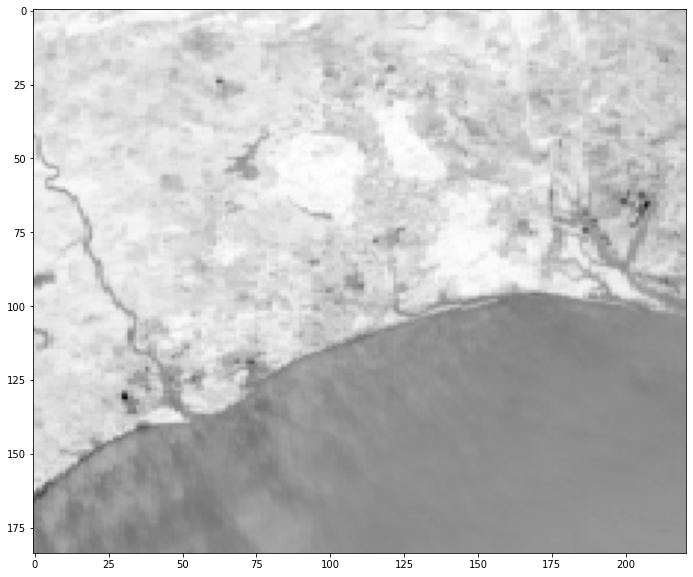

In [ ]:

# anaconda users
path = r'C:/Users/Massimo/anaconda3/envs/snap/Lib/snappy/testdata'
filename = 'MER_FRS_L1B_SUBSET.dim'
# Read File
df = ProductIO.readProduct(os.path.join(path, filename))
# Get the list of Band Names
list(df.getBandNames())
# Using "radiance_3" band as an example
band = df.getBand('radiance_3') # Assign Band to a variable
w = df.getSceneRasterWidth() # Get Band Width
h = df.getSceneRasterHeight() # Get Band Height
# Create an empty array
band_data = np.zeros(w * h, np.float32)
# Populate array with pixel value
band.readPixels(0, 0, w, h, band_data) 
# Reshape
band_data.shape = h, w
# Plot the band  
plt.figure(figsize=(18,10))
plt.imshow(band_data, cmap = plt.cm.binary)
plt.show()

https://forum.step.esa.int/t/using-snappy-in-olci-sentinel-3-images/17366

In [6]:
from snappy import HashMap
import gc   
from snappy import GPF
jpy = snappy.jpy
from snappy import ProductIO
from snappy import ProductIO, File

File = jpy.get_type('java.io.File')
#archi=File('S3A_OL_1_EFR____20190615T064725_20190615T065025_20190616T105435_0179_046_020_3060_LN1_O_NT_002.SEN3')
archi=File('C:/Users/Massimo/Documents/SchoolFolder/ThirdYear/Thesis/SentinelData/2021/extra/S3B_SL_2_LST____20210616T094035_20210616T094335_20210617T190722_0179_053_307_2340_LN2_O_NT_004.SEN3')
product = ProductIO.readProduct(archi)
reader = snappy.ProductIO.getProductReader('SEN3')

In [7]:
list(product.getBandNames())

['LST_uncertainty_locATM',
 'LST_uncertainty_locGEO',
 'LST_uncertainty_locSF',
 'LST_uncertainty_locT',
 'LST_uncertainty_random',
 'LST_uncertainty_sys',
 'NDVI',
 'TCWV',
 'biome',
 'fraction',
 'LST',
 'LST_uncertainty',
 'exception',
 'x_in',
 'y_in',
 'bayes_in',
 'cloud_in',
 'confidence_in',
 'pointing_in',
 'probability_cloud_dual_in',
 'probability_cloud_single_in',
 'elevation_in',
 'latitude_in',
 'longitude_in',
 'detector_in',
 'pixel_in',
 'scan_in']

In [8]:
band = product.getBand('LST') # Assign Band to a variable
w = product.getSceneRasterWidth() # Get Band Width
h = product.getSceneRasterHeight() # Get Band Height

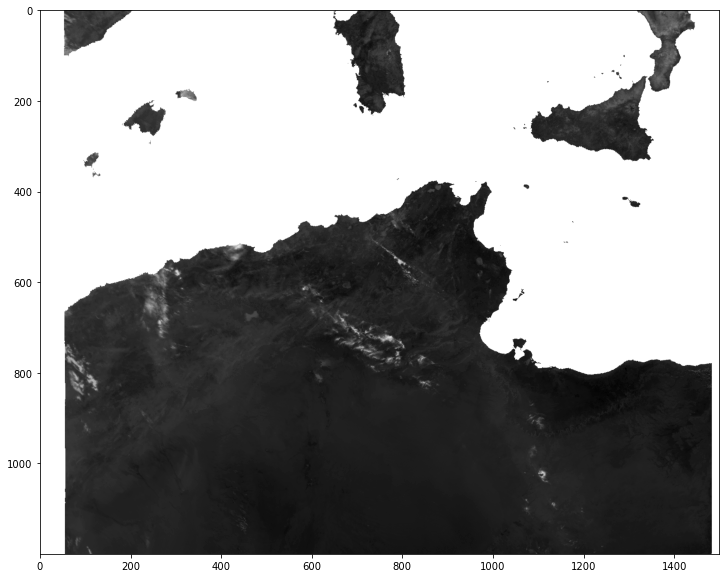

In [14]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import cartopy.crs as ccrs
from rasterio.plot import show
from rasterio.enums import Resampling
import rasterio

# Create an empty array
band_data = np.zeros(w * h, np.float32)
# Populate array with pixel value
band.readPixels(0, 0, w, h, band_data) 
# Reshape
band_data.shape = h, w
# Plot the band  
plt.figure(figsize=(18,10))

##B/W
plt.imshow(band_data, cmap = plt.cm.binary)

##Heatmap colours
#color = cm.jet
#color.set_bad('white')
#plt.imshow(band_data, cmap = color)

plt.show()